# Summary Notebook for a NN and DNN model prototypes

The following models were executed:

* NN with 1 hidden layer and 340 neurons  
* NN with 2 hidden layer and 128 neurons each
* NN with 2 hidden layers and 340 neuron each
* CNN with 1 convolution layer 
* LSTM 

See below cells for summary of each architecture



In [17]:

import pandas as pd
import util.plot_util as pu
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model


sns.set()
%matplotlib inline


In [4]:

REPORT_FILE = "reports/2019-06-23-NN_notebook_protype-report.csv"
report = pd.read_csv(REPORT_FILE).sort_values(["model_name", "description", "normalization"])




## Looking at Macro Average F1-score. CNN and LSTM seems to be doing slightly better our Neural Networks


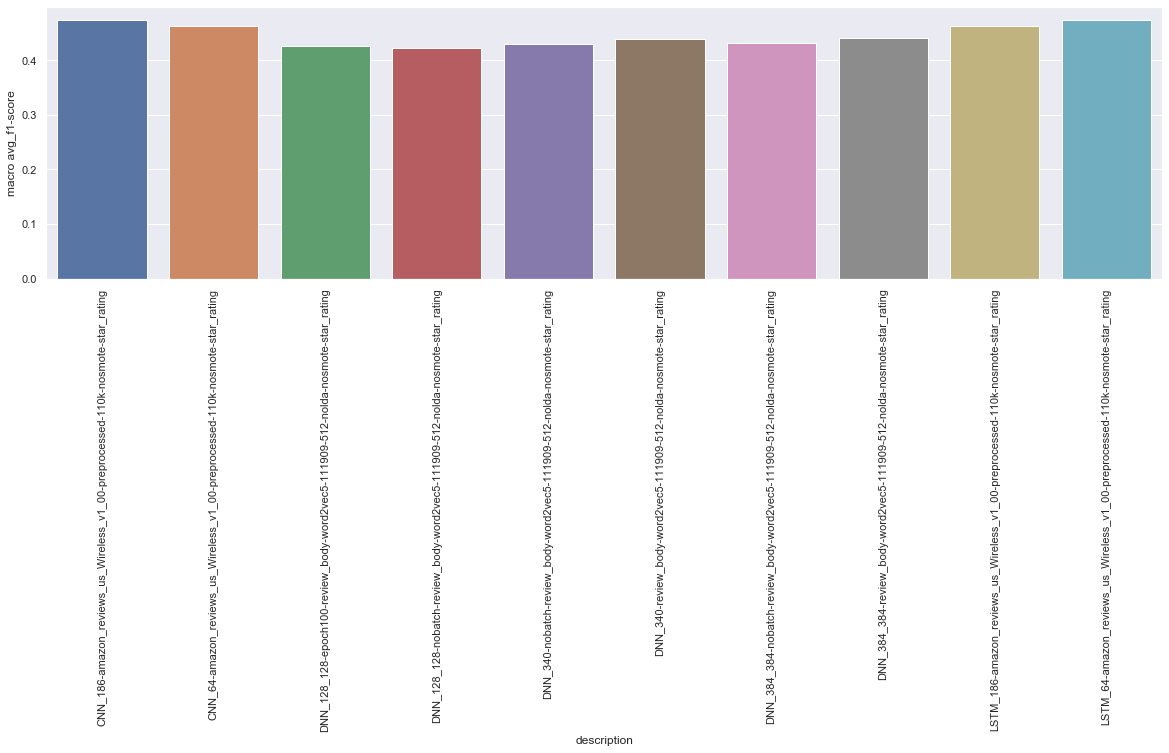

In [5]:

# plot overall accurracy scores


f, a = plt.subplots(1, 1, figsize=(20, 5))
g = sns.barplot(report.description, report["macro avg_f1-score"], ax=a)
_ = g.set_xticklabels(labels=report.description, rotation=90)



# Lets' look at our Neural Networks First

I experimented with a couple variations

* Number of hidden layers and neurons
* Batch Normalization and without Batch Normalization between layers


### Let's look at Batch Normalization vs No Batch Normalizations First




In [18]:

dnn = report[report.model_name.str.startswith("DNN")]
dnn.head()

CLASS_F1_COLS, CLASS_PRECISION_COLS, CLASS_RECALL_COLS  = pu.get_score_columns(dnn)


## Keys for the Graph

| Label | Description |
|-------|-------------|
| DNN_128_128 | 2 layer NN with 128 hidden untils in each layer |
| DNN_340 | 1 layer NN with 340 hidden units |
| DNN_384_384 | 2 layer NN with 384 hidden units in each layer |

Input features were generated from word2vec as this preformed slightly better in our previous notebook compared to fasttext

Each architecture was runned twice, once with BatchNormalization in between hidden layers and once without

Notebooks:

* 1 Layer NN with 384 nodes no batch normalization - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_340-nobatch-word2vec5-prototype.ipynb
* 1 Layer NN with 384 nodes with batch normalization - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_340-word2vec5-prototype.ipynb
* 2 Layer NN with 128 nodes each with no batch normalization - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_128_128-nobatch-word2vec5-prototype.ipynb
* 2 Layer NN with 128 nodes each with batch normalization - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_128_128-word2vec5-prototype.ipynb
* 2 Layer DNN with 384 nodes each with no batch norm - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_384_384-nobatch-word2vec5-prototype.ipynb
* 2 Layer DNN with 384 nodes each with batch norm - https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-DNN_384_384-word2vec5-prototype.ipynb


I'm only printing out summary of architecture here for models that did not use BatchNormalization. You will see later in the notebook that batch normalization did not help


In [19]:

# print out all model architectures

for index, row in dnn.iterrows():
    if row["normalization"] == "na":
        print(f"\n\n{row.description}\n")
        model = load_model(row.model_file)
        print(model.summary())



DNN_128_128-nobatch-review_body-word2vec5-111909-512-nolda-nosmote-star_rating

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
____________________________________________________________

/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


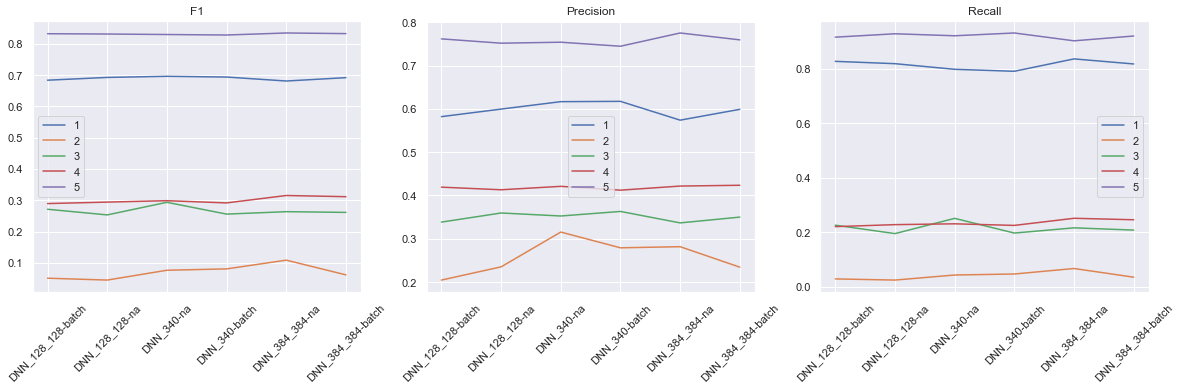

In [16]:

dnn["label"] = dnn.model_name + "-" + dnn.normalization

f, a = plt.subplots(1, 3, figsize=(20, 5))
index = 0
table_labels = ["F1", "Precision", "Recall"]
for cols in CLASS_F1_COLS, CLASS_PRECISION_COLS, CLASS_RECALL_COLS:
    # print(cols)
    for col in cols:
        # column names return label as well, have to skip
        if col != "label":
            score = col.split("_")[0]
            # print(f'dnn col values: {dnn[col].values}')
            # print(f'dnn col length: {len(dnn[col].values)}')
            # print(f'dnn label length: {len(dnn.label.values)}')
            g = sns.lineplot(x=dnn.label.values, y=dnn[col].values, label = score, ax = a[index])
        _ = a[index].set_xticklabels(labels=dnn.label.values, rotation=45)
        _ = a[index].set_title(table_labels[index])
    index += 1




In [11]:

# display confusion matrix

dnn_nobatch = dnn[dnn.normalization == "na"]
for index, row in dnn_nobatch.iterrows():
    print(f"\n\n{row.label}")
    matrix = row.confusion_matrix
    matrix = matrix.replace('\\n', '\n')
    print(matrix)
    



DNN_128_128-na
[[ 3171    64   195    95   350]
 [  980    47   289   197   374]
 [  580    58   500   597   825]
 [  250    19   259  1058  3051]
 [  308    12   148   614 13937]]


DNN_340-na
[[ 3063    98   204   105   405]
 [  903    89   286   190   419]
 [  502    83   505   594   876]
 [  226    28   247  1045  3091]
 [  267    21   149   601 13981]]


DNN_384_384-na
[[ 3167    87   223    77   321]
 [  980    67   310   185   345]
 [  569    81   533   599   778]
 [  261    27   278  1141  2930]
 [  310    24   179   692 13814]]



### NN Summary

1-star and 5-star ratings have the most samples so generally have the highest scores as we have seen in prevsious notebooks

* F1 
    * F1 score improved as we introduced more hidden layers and nodes into the network
* NN seems to be most accurrate in predicting 2-star ratings with a single layer NN with 340 nodes
* Single layer NN seems to also be able to correctly identify 3-star ratings best 

* Batch Normalization
    * Batch Normalization seems to help for single layer NN but decreases F1 scores as we introduce more hidden layers and neurons
    * Precision drops in all architecture with batch normalization
    * Recall also tends to drop with Batch Normalization
    
We will not look at results with Batch Normalization from now on


Best overall model out of these is single layer NN with 340 nodes
    



# CNN and LSTM

In addition to playing with the 2 types of networks, I always played around with the sequence length for our input

95% of reivews have 64 words or less
99% of reviews have 184 words or less

Both of these were fed into our networks to see if there would be a difference

Please refer to the following notebooks:

* CNN: https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-CNN_prototype.ipynb
* LSTM: https://github.com/sv650s/sb-capstone/blob/master/2019-06-23-LSTM_prototype.ipynb

NOTE: Notebooks were executed on Google Colab and were downloaded and checked in



In [20]:
cnn = report[report.model_name.str.startswith("CNN") | 
             report.model_name.str.startswith("LSTM")].sort_values(["model_name", "max_sequence_length"])
cnn.head()


,1_f1-score,1_precision,1_recall,1_support,2_f1-score,2_precision,2_recall,2_support,3_f1-score,3_precision,...,status_date,test_examples,test_features,tokenizer_file,train_examples,train_features,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support
0,0.692583,0.657311,0.731855,3968,0.227756,0.263713,0.200428,1871,0.283292,0.325307,...,6/23/19 4:20,28011,84,2019-06-23-amazon_reviews_us_Wireless_v1_00-pr...,84032,84,0.624529,0.613148,0.656349,28011
3,0.700157,0.672154,0.730595,3968,0.216788,0.283983,0.175307,1871,0.341515,0.306965,...,6/23/19 6:02,28011,186,2019-06-23-amazon_reviews_us_Wireless_v1_00-pr...,84032,186,0.631784,0.625611,0.655135,28011
1,0.696852,0.670550,0.725302,3968,0.195760,0.288843,0.148049,1871,0.304048,0.334122,...,6/23/19 5:20,28011,84,2019-06-23-amazon_reviews_us_Wireless_v1_00-pr...,84032,84,0.636563,0.623141,0.661097,28011
2,0.695561,0.643853,0.756300,3968,0.147661,0.266760,0.102084,1871,0.325938,0.332921,...,6/23/19 5:51,28011,186,2019-06-23-amazon_reviews_us_Wireless_v1_00-pr...,84032,186,0.631473,0.619707,0.663561,28011


In [27]:
for index, row in cnn.iterrows():
    print(f"\n\n{row.description}\n")
    model = load_model(row.model_file)
    print(model.summary())



CNN_64-amazon_reviews_us_Wireless_v1_00-preprocessed-110k-nosmote-star_rating

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 84, 32)            1305248   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 84, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 42, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1344)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               336250    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1255      
Total params: 1,645,857
Trainable params: 1,645,857
Non-train

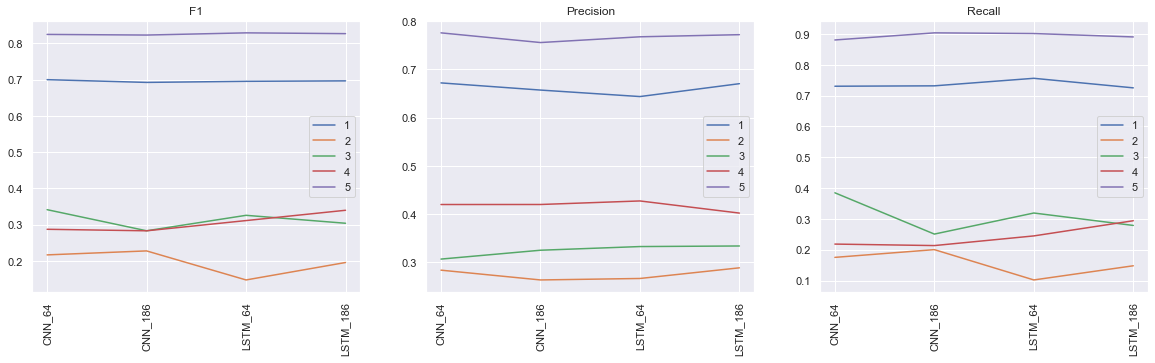

In [28]:

cnn["label"] = cnn.description.apply(lambda x: x.split("-")[0])
# print(cnn["label"])

f, a = plt.subplots(1, 3, figsize=(20, 5))
index = 0
table_labels = ["F1", "Precision", "Recall"]
for cols in CLASS_F1_COLS, CLASS_PRECISION_COLS, CLASS_RECALL_COLS:
    # print(cols)
    for col in cols:
        # column names return label as well, have to skip
        if col != "label":
            score = col.split("_")[0]
            # print(f'cnn col values: {cnn[col].values}')
            # print(f'cnn col length: {len(cnn[col].values)}')
            # print(f'cnn label length: {len(cnn.label.values)}')
            g = sns.lineplot(x=cnn.label.values, y=cnn[col].values, label = score, ax = a[index])
        _ = a[index].set_xticklabels(labels=cnn.label.values, rotation=90)
        _ = a[index].set_title(table_labels[index])
    index += 1


In [22]:

for index, row in cnn.iterrows():
    print(f"\n\n{row.label}")
    matrix = row.confusion_matrix
    matrix = matrix.replace('\\n', '\n')
    print(matrix)




CNN_64
[[ 2904   441   228    55   340]
 [  744   375   327   117   308]
 [  427   348   635   373   748]
 [  132   148   506  1015  2951]
 [  211   110   256   856 13456]]


CNN_186
[[ 2899   366   407    36   260]
 [  719   328   501    88   235]
 [  383   280   974   308   586]
 [  117    99   792  1038  2706]
 [  195    82   499  1001 13112]]


LSTM_64
[[ 2878   342   330   107   311]
 [  676   277   430   215   273]
 [  390   204   706   638   593]
 [  131    76   411  1398  2736]
 [  217    60   236  1117 13259]]


LSTM_186
[[ 3001   236   343    60   328]
 [  801   191   444   146   289]
 [  458   175   808   442   648]
 [  174    73   545  1164  2796]
 [  227    41   287   911 13423]]



# CNN and LSTM Summary

* F1 score slightly improves as we increase sequence length of our imput
    * 95% of our reivews have 64 woord oor less. 99% of our reviews have 186 words or less
* LSTM seems to be better at identifying 4-star and 3-star ratings compared to CNN's
* However, CNN's seem to be better for our problematic 2-star ratings
    
 
Since 2-star ratings seems to be our problematic area, I think CNN_64 seems to be the best model here since it correclty identified the most 2-star ratings and have reasonable precision and recall compared to the rest


# Comparing our Best Models So Far

I'm going to look at results from before and compare our best models here:


* Logistic Regression - 100 iterations with word2vec embedding
* CNN - max sequence lenght of 64
* LSTM - max sequence length of 186
* DNN - single layer with 340 nodes

In [53]:
compare_report = pd.read_csv("reports/2019-06-23-compare-best-models-report.csv")

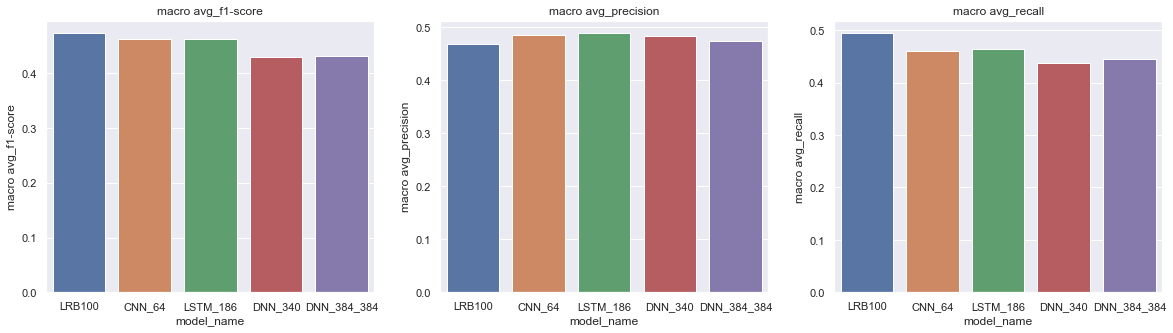

In [51]:
f, a = plt.subplots(1, 3, figsize=(20, 5))

avg_cols = ["macro avg_f1-score", "macro avg_precision", "macro avg_recall"]

index = 0
for col in avg_cols:
#     scores = compare_report[compare_report.model_name == model][avg_cols]
#     print(scores)
#     scores.hist(ax=a[index])
    sns.barplot(data=compare_report, x=compare_report.model_name, y=compare_report[col], ax=a[index])
    a[index].set_title(col)
    index += 1

# g = sns.barplot(compare_report.model_name, compare_report["macro avg_f1-score"], ax=a)
# g = sns.barplot(compare_report.model_name, compare_report["macro avg_precision"], ax=a)
# g = sns.barplot(compare_report.model_name, compare_report["macro avg_recall"], ax=a)
# _ = g.set_xticklabels(labels=compare_report.model_name, rotation=90)


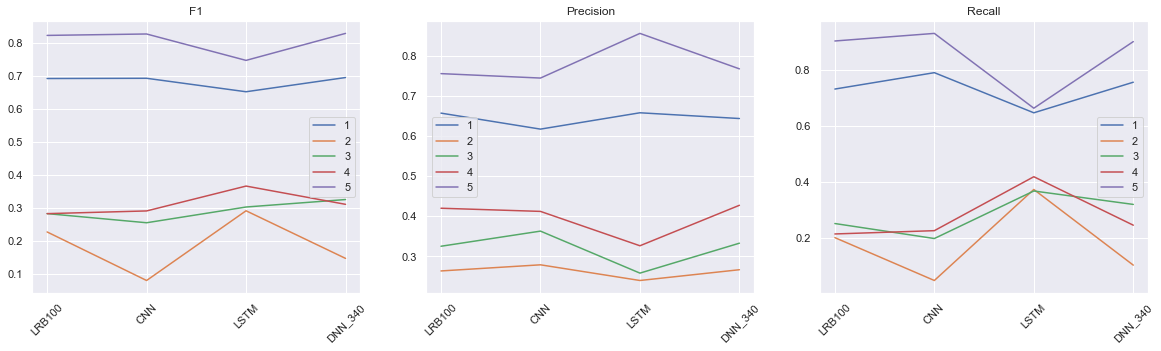

In [31]:

f, a = plt.subplots(1, 3, figsize=(20, 5))
index = 0
table_labels = ["F1", "Precision", "Recall"]
for cols in CLASS_F1_COLS, CLASS_PRECISION_COLS, CLASS_RECALL_COLS:
    # print(cols)
    for col in cols:
        # column names return label as well, have to skip
        if col != "label":
            score = col.split("_")[0]
            g = sns.lineplot(x=compare_report.model_name.values, y=compare_report[col].values, label = score, ax = a[index])
        _ = a[index].set_xticklabels(labels=compare_report.model_name.values, rotation=45)
        _ = a[index].set_title(table_labels[index])
    index += 1




In [54]:

for index, row in compare_report.iterrows():
    print(f"\n\n{row.model_name}")
    matrix = row.confusion_matrix
    matrix = matrix.replace('\\n', '\n')
    print(matrix)




LRB100
[[2532  866  326  103   87]
 [ 553  701  428  129   70]
 [ 280  620  934  499  210]
 [ 139  312  980 1963 1299]
 [ 343  423  948 3318 9915]]


CNN_64
[[ 2904   441   228    55   340]
 [  744   375   327   117   308]
 [  427   348   635   373   748]
 [  132   148   506  1015  2951]
 [  211   110   256   856 13456]]


LSTM_186
[[ 3001   236   343    60   328]
 [  801   191   444   146   289]
 [  458   175   808   442   648]
 [  174    73   545  1164  2796]
 [  227    41   287   911 13423]]


DNN_340
[[ 3063    98   204   105   405]
 [  903    89   286   190   419]
 [  502    83   505   594   876]
 [  226    28   247  1045  3091]
 [  267    21   149   601 13981]]


DNN_384_384
[[ 3167    87   223    77   321]
 [  980    67   310   185   345]
 [  569    81   533   599   778]
 [  261    27   278  1141  2930]
 [  310    24   179   692 13814]]


# Comparison Summary

* LSTM seems to do better than LR when it comes to F1 score for our problematic 2/3/4-star ratings, however, for 1-star and 5-stars it seems to drop
* LSTM precision is higher than LR for 4/5-star ratings but are performing worse for 2/3/4-star ratings - meaning that it tends to mis-classify 2/3/4 as other class more than LR
* LSTM's recall for 2/3/4-stars are higher than LR which means that it's better and finding these ratings than LR but worse at identifying 1/5-star ratings that LR


Seems like LSTM may be a reasonable choice in model to use if we are willing to trade off some accuracy for 4/5-star ratings which are already pretty high


NOTE: <font color="red"> There is something strange with the confusion matrix for DNN_340, there seems to be a lot less actuals in 2-stars than the rest even though they all have 110k input<font>